In [169]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
# https://www.kaggle.com/rishidamarla/tesla-stock-prediction-using-linear-regression/data

In [170]:
# df = pd.read_csv('TSLA.csv')
# df.head()
df = web.DataReader('BTC-USD', data_source = 'yahoo', start = '2012-01-01', end = '2021-5-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014
...,...,...,...,...,...,...
2021-05-13,51438.117188,48868.578125,49682.980469,49880.535156,5.573750e+10,49880.535156
2021-05-14,50639.664062,46664.140625,49855.496094,46760.187500,5.916105e+10,46760.187500
2021-05-15,49720.042969,43963.351562,46716.636719,46456.058594,6.404787e+10,46456.058594


In [171]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2432 entries, 2014-09-16 to 2021-05-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2432 non-null   float64
 1   Low        2432 non-null   float64
 2   Open       2432 non-null   float64
 3   Close      2432 non-null   float64
 4   Volume     2432 non-null   float64
 5   Adj Close  2432 non-null   float64
dtypes: float64(6)
memory usage: 133.0 KB


In [172]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2432.000000,2432.000000,2432.000000,2432.000000,2.432000e+03,2432.000000
mean,7611.533973,7183.415879,7404.312977,7420.504237,1.229791e+10,7420.504237
std,11765.279296,11018.995455,11415.702298,11434.858660,1.933731e+10,11434.858660
min,211.731003,171.509995,176.897003,178.102997,5.914570e+06,178.102997
25%,464.616249,453.503998,458.050995,458.414009,6.830960e+07,458.414009
50%,4355.370117,4089.660400,4200.536621,4220.365967,3.958235e+09,4220.365967
75%,9295.054443,8938.100098,9143.206543,9153.304443,1.829114e+10,9153.304443
max,64863.097656,62208.964844,63523.753906,63503.457031,3.509679e+11,63503.457031


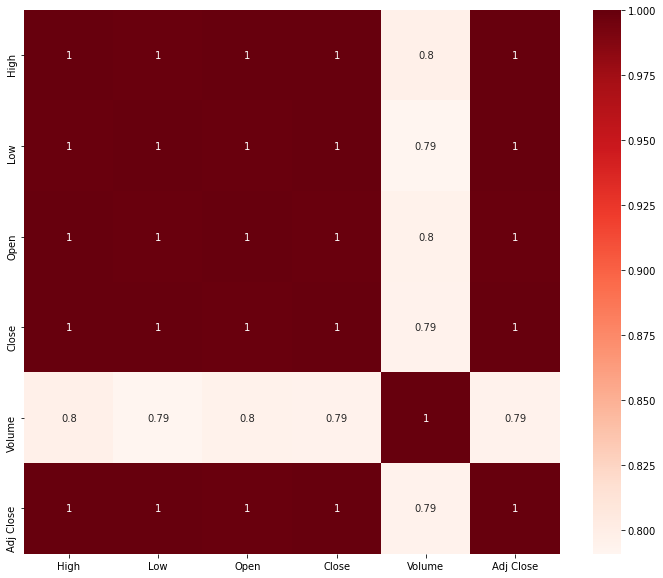

In [173]:
# feature selection
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [174]:
# x = df[['High', 'Low', 'Open']].values
x = df[['Open']].values
y = df['Close'].values

In [175]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [176]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [177]:
print(regressor.coef_)
print(regressor.intercept_)

# close= 0.85090964  *'High'+ 0.78961152 *'Low' -0.64088659*'Open' -0.006674248452014808


[1.00361607]
-7.045742610084744


In [178]:
predicted = regressor.predict(x_test)
# print(predicted)

In [179]:
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})
df2.head(100)

,Actual,Predicted
0,577.760986,575.232220
1,6729.740234,6797.561364
2,3521.101807,3760.603707
3,6359.490234,6389.190084
4,6191.192871,5257.338542
...,...,...
95,5285.139160,5283.763831
96,4338.709961,4174.129055
97,921.789001,891.741634
98,59057.878906,58966.312551


In [180]:
# df2['time']=df['Date']

In [181]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 235.9208424688029
Mean Squared Error: 337026.18561591627
Root Mean Squared Error: 580.539564212394


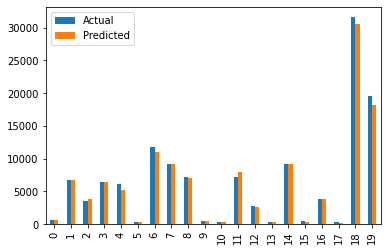

In [182]:
graph = df2.head(20)
graph.plot(kind='bar')

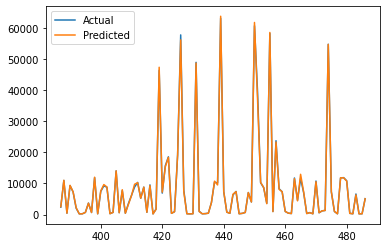

In [183]:
df3=df2.tail(100)
plt.plot(df3[['Actual']], label = "Actual")
plt.plot(df3[['Predicted']], label = "Predicted")
plt.legend()
plt.show()